# Classification using expenses data from 2019-2021

### 1. Problem  definition

Explore the data using a **binary classification** (overbudget or underbudget)

Use different **features** (i.e., pieces of information) about the spendings to predict whether we will go overbudget

Problem statement:
> Given the expenses in a given month, can we predict whether we will be overbudget?

### 2. Data and data features

The data was collected between Sept 2019 - Dec 2021 using Excel

Feature summary:
* All columns with the exception of date and spending days are store locations

* Date is written and formatted in Excel based on `YYY-MM-DD`

* Spending days are tabulated based on frequency of dates in a given month

* Budget is set to 1,000 for this exercise. For months that exceeded 1,000, there is a value of `1`. Else the value is set to `0`.

### 3. Evaluation 

How well can we predict budget constraints given a limited, and occasionally ongoing, expenses list?

## Plan of action

1. Prepare the tools 
2. Load data
3. Data exploration and preprocessing
4. Modelling
5. Evaluation of models
6. Future work

### 1. Prepare the tools

In [30]:
# Plots to appear in notebook
%matplotlib inline

# Data processing/exploration
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import time

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluators for classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### 2. Load the data

In [2]:
df = pd.read_csv("Finances.csv")
df.columns = ["Date", "Metro", "Zehrs_NF", "HG", "WM", "TT", "Costco", "Campus", "MF", "BB", "Longos", "Trotters", "Resto", "Baker", "Misc", "Budget", "Spending_days"]
df

,Date,Metro,Zehrs_NF,HG,WM,TT,Costco,Campus,MF,BB,Longos,Trotters,Resto,Baker,Misc,Budget,Spending_days
0,NaN,271.45,38.48,24.72,77.17,72.55,0.0,61.29,31.27,4.71,0.0,0.0,87.67,40.0,1211.34,1,16.0
1,2019-09-03,95.44,NaN,NaN,77.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16.0
2,2019-09-05,NaN,NaN,NaN,NaN,NaN,NaN,11.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16.0
3,2019-09-06,70.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16.0
4,2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN,50.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2021-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365.54,1,16.0
364,2021-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.21,1,16.0
365,2021-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.93,1,16.0
366,2021-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.00,1,16.0


Since there are missing dates, drop all rows containing `NaN` for date and make a temporary copy

In [3]:
df = df.dropna(subset=["Date"]).reset_index(drop=True)
df_tmp = df
df_tmp

,Date,Metro,Zehrs_NF,HG,WM,TT,Costco,Campus,MF,BB,Longos,Trotters,Resto,Baker,Misc,Budget,Spending_days
0,2019-09-03,95.44,NaN,NaN,77.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16.0
1,2019-09-05,NaN,NaN,NaN,NaN,NaN,NaN,11.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16.0
2,2019-09-06,70.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16.0
3,2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN,50.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16.0
4,2019-09-10,40.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2021-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365.54,1,16.0
305,2021-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.21,1,16.0
306,2021-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.93,1,16.0
307,2021-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.00,1,16.0


For all values with 0 that are not Date, Budget, or Spending_days, put in a value of `0`.

In [4]:
df_tmp[["Metro", "Zehrs_NF", "HG", "WM", "TT", "Costco", "Campus", "MF", "BB", "Longos", "Trotters", "Resto", "Baker", "Misc"]] = df_tmp[["Metro", "Zehrs_NF", "HG", "WM", "TT", "Costco", "Campus", "MF", "BB", "Longos", "Trotters", "Resto", "Baker", "Misc"]].fillna(value=0)
df_tmp

,Date,Metro,Zehrs_NF,HG,WM,TT,Costco,Campus,MF,BB,Longos,Trotters,Resto,Baker,Misc,Budget,Spending_days
0,2019-09-03,95.44,0.0,0.0,77.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0
1,2019-09-05,0.00,0.0,0.0,0.00,0.0,0.0,11.29,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0
2,2019-09-06,70.14,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0
3,2019-09-09,0.00,0.0,0.0,0.00,0.0,0.0,50.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0
4,2019-09-10,40.18,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2021-12-18,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,365.54,1,16.0
305,2021-12-19,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,103.21,1,16.0
306,2021-12-20,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,182.93,1,16.0
307,2021-12-22,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,150.00,1,16.0


Let's check that there are no more missing values.

### 3. Data exploration and preprocessing

In [5]:
df_tmp.isna().sum()

Date             0
Metro            0
Zehrs_NF         0
HG               0
WM               0
TT               0
Costco           0
Campus           0
MF               0
BB               0
Longos           0
Trotters         0
Resto            0
Baker            0
Misc             0
Budget           0
Spending_days    0
dtype: int64

In [6]:
# Convert dates to Pandas datetime
df_tmp["Date"] = pd.to_datetime(df_tmp["Date"])
df_tmp

,Date,Metro,Zehrs_NF,HG,WM,TT,Costco,Campus,MF,BB,Longos,Trotters,Resto,Baker,Misc,Budget,Spending_days
0,2019-09-03,95.44,0.0,0.0,77.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0
1,2019-09-05,0.00,0.0,0.0,0.00,0.0,0.0,11.29,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0
2,2019-09-06,70.14,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0
3,2019-09-09,0.00,0.0,0.0,0.00,0.0,0.0,50.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0
4,2019-09-10,40.18,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2021-12-18,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,365.54,1,16.0
305,2021-12-19,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,103.21,1,16.0
306,2021-12-20,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,182.93,1,16.0
307,2021-12-22,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,150.00,1,16.0


In [7]:
def split_date(df):
    df_tmp["spendyear"] = df_tmp.Date.dt.year
    df_tmp["spendmonth"] = df_tmp.Date.dt.month
    df_tmp["spendday"] = df_tmp.Date.dt.day
    df_tmp.drop("Date", axis=1, inplace=True)
    return df

split_date(df)

,Metro,Zehrs_NF,HG,WM,TT,Costco,Campus,MF,BB,Longos,Trotters,Resto,Baker,Misc,Budget,Spending_days,spendyear,spendmonth,spendday
0,95.44,0.0,0.0,77.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0,2019,9,3
1,0.00,0.0,0.0,0.00,0.0,0.0,11.29,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0,2019,9,5
2,70.14,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0,2019,9,6
3,0.00,0.0,0.0,0.00,0.0,0.0,50.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0,2019,9,9
4,40.18,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0,2019,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,365.54,1,16.0,2021,12,18
305,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,103.21,1,16.0,2021,12,19
306,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,182.93,1,16.0,2021,12,20
307,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,150.00,1,16.0,2021,12,22


Currently the column names are a mixture of upper and lower case letters. For ease, convert all to lower case

In [9]:
# Convert all headers to lower case
df_tmp.columns = map(str.lower, df_tmp)
# "save" the temp into the original df
df = df_tmp
# check df_tmp
df_tmp

,metro,zehrs_nf,hg,wm,tt,costco,campus,mf,bb,longos,trotters,resto,baker,misc,budget,spending_days,spendyear,spendmonth,spendday
0,95.44,0.0,0.0,77.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0,2019,9,3
1,0.00,0.0,0.0,0.00,0.0,0.0,11.29,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0,2019,9,5
2,70.14,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0,2019,9,6
3,0.00,0.0,0.0,0.00,0.0,0.0,50.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0,2019,9,9
4,40.18,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,16.0,2019,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,365.54,1,16.0,2021,12,18
305,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,103.21,1,16.0,2021,12,19
306,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,182.93,1,16.0,2021,12,20
307,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,150.00,1,16.0,2021,12,22


#### For further exploration, let's look at scatter plots of various features within the dataset 

Below we're looking at the correlation between the spending days and metro.

Let's also look at a bar plot of overbudget frequencies by month and a histogram.

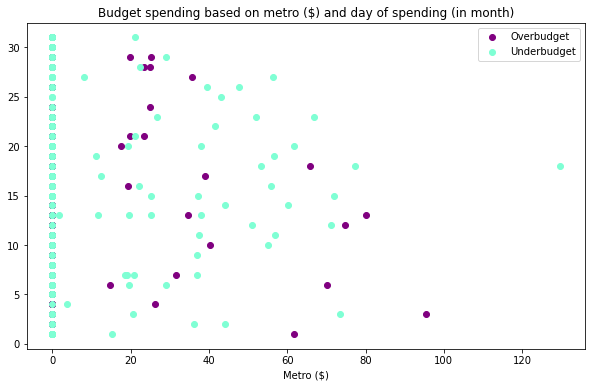

In [12]:
plt.figure(figsize=(10,6))

# Start with positive examples
plt.scatter(df_tmp.metro[df_tmp.budget==1], # the condition where target = 1 in age column
            df_tmp.spendday[df_tmp.budget==1], 
            c="purple") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df_tmp.metro[df_tmp.budget==0], # the condition where target = 0 in age column
            df_tmp.spendday[df_tmp.budget==0], 
            c="aquamarine") # axis always come as (x, y)

# Add some helpful info
plt.title("Budget spending based on metro ($) and day of spending (in month)")
plt.xlabel("Metro ($)")
plt.legend(["Overbudget", "Underbudget"])
pass

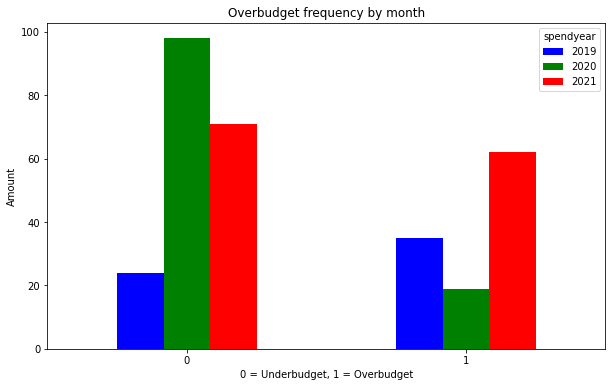

In [11]:
# Visualizing a metric based on two columns
pd.crosstab(df_tmp.budget, df_tmp.spendyear).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["b", "g", "r", "c", "m", "y", "k", "w", "0.8", "aquamarine", "purple", "mediumseagreen"])
plt.title("Overbudget frequency by month")
plt.xlabel("0 = Underbudget, 1 = Overbudget")
plt.ylabel("Amount")
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

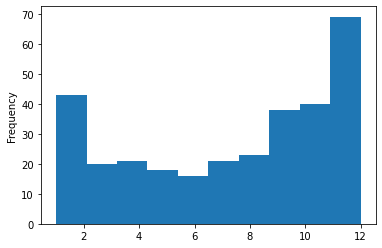

In [13]:
# Histograms to check the distribution of a variable
df_tmp["spendmonth"].plot.hist();

Just noticed that there's no data for `Costco`, so let's remove that column

In [14]:
df_tmp.drop("costco", axis=1, inplace=True)

Let's make a correlation matrix of our variables and plot them so it's easier to see

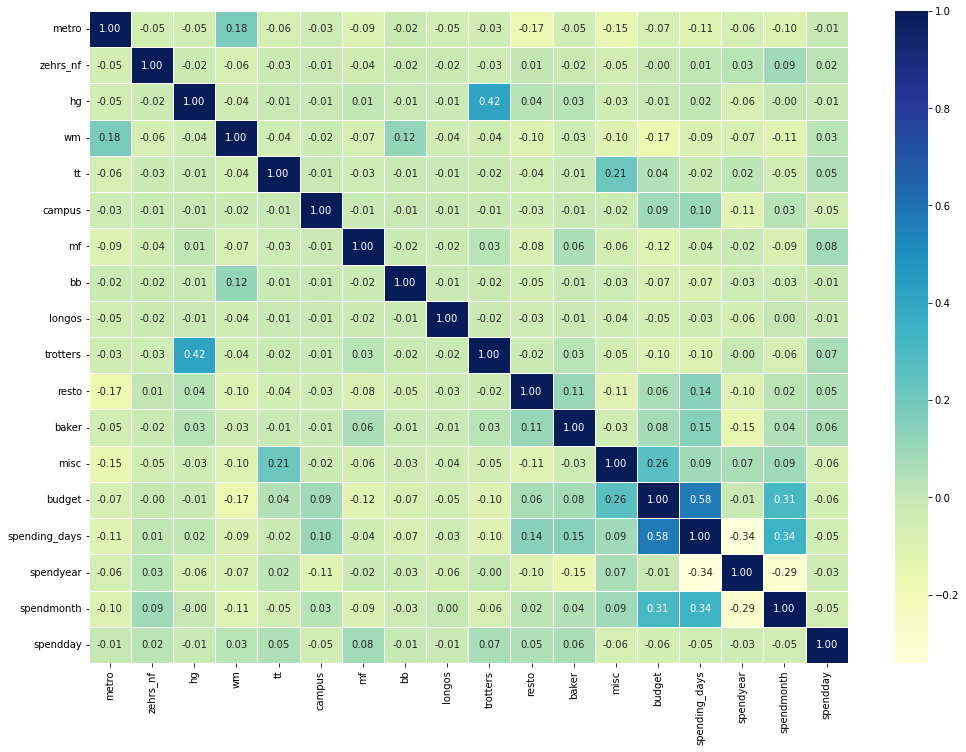

In [15]:
corr_matrix = df_tmp.corr()

plt.figure(figsize=(17, 12))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

Let's look once more at the data statistics

In [16]:
df_tmp.describe()

,metro,zehrs_nf,hg,wm,tt,campus,mf,bb,longos,trotters,resto,baker,misc,budget,spending_days,spendyear,spendmonth,spendday
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,9.260971,1.640097,0.228285,3.958964,2.681100,0.198350,1.478447,0.184854,0.432524,1.726181,12.453916,0.326278,42.589100,0.375405,11.682848,2020.239482,7.317152,15.084142
std,20.052831,8.618662,2.058343,12.173356,20.214269,2.913976,7.219719,1.672118,3.950400,10.988979,26.832885,3.181489,118.216837,0.485013,2.883517,0.752223,3.547873,8.876829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2019.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2020.000000,4.000000,8.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,11.000000,2020.000000,8.000000,15.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.660000,0.000000,30.790000,1.000000,13.000000,2021.000000,10.000000,22.000000
max,129.550000,95.480000,24.720000,77.170000,285.940000,50.000000,66.510000,21.210000,56.070000,121.980000,201.400000,40.000000,1116.250000,1.000000,19.000000,2021.000000,12.000000,31.000000


### 4. Modelling

Let's set up by splitting the dataframe into our independent and dependent variables, then split our training and testing sets. 

In [17]:
X = df_tmp.drop("budget", axis=1) # independent variables

y = df["budget"].values # dependent variables

In [18]:
# random seed for reproducibility
np.random.seed(25)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2)

In [19]:
X_train.head()

,metro,zehrs_nf,hg,wm,tt,campus,mf,bb,longos,trotters,resto,baker,misc,spending_days,spendyear,spendmonth,spendday
158,0.0,0.0,0.0,15.88,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,10.0,2020,11,4
161,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,57.16,0.0,0.0,10.0,2020,11,14
97,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,36.44,0.0,0.0,10.0,2020,4,20
281,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,21.45,0.0,0.0,12.0,2021,10,27
299,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,59.89,0.0,0.0,16.0,2021,12,12


Model choices

Now that we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

    Logistic Regression - LogisticRegression()
    K-Nearest Neighbors - KNeighboursClassifier()
    RandomForest - RandomForestClassifier()

In [20]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(25)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [21]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\AK\Desktop\Udemy_ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5806451612903226,
 'Logistic Regression': 0.7580645161290323,
 'Random Forest': 0.8870967741935484}

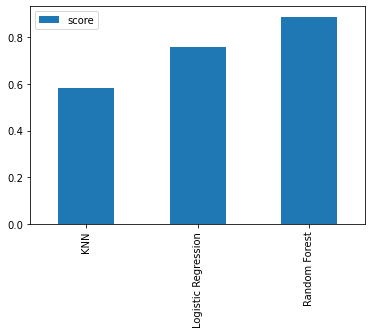

In [22]:
model_compare = pd.DataFrame(model_scores, index=['score'])
model_compare.T.plot.bar();

Now let's look at different ways of tuning the hyperparameters starting with the `KNN` model

* **Hyperparameter tuning** - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.

In [23]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 66.13%


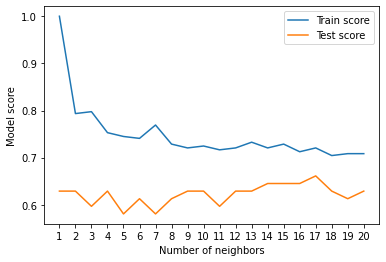

In [24]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Let's try a `RandomizedSearchCV` for logistic regression

In [25]:
# Setup random seed
np.random.seed(25)

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20), #returns numbers between 10^-4 and 10^4 for 20 numbers evenly spaced
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [26]:
rs_log_reg.best_params_, rs_log_reg.score(X_test, y_test)

({'solver': 'liblinear', 'C': 0.004832930238571752}, 0.8064516129032258)

Seems like the logistic regression had ~5% improvement. What about the `RandomForestClassifier`? 

In [27]:
# Setup random seed
np.random.seed(25)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

rs_rf.best_params_, rs_rf.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'n_estimators': 910,
  'min_samples_split': 14,
  'min_samples_leaf': 3,
  'max_depth': None},
 0.8709677419354839)

In [32]:
%%time 
# checks the length of time for this code to run

# Different RFC hyperparameters
rf_reg_grid = {"n_estimators": np.arange(700, 1000, 100),
           "max_depth": [None],
           "min_samples_split": np.arange(8, 16, 4),
           "min_samples_leaf": np.arange(3, 16, 4)}

# Setup grid hyperparameter search for LogisticRegression
gs_rf_reg = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_rf_reg.fit(X_train, y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 2min
Wall time: 2min


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None],
                         'min_samples_leaf': array([ 3,  7, 11, 15]),
                         'min_samples_split': array([ 8, 12]),
                         'n_estimators': array([700, 800, 900])},
             verbose=True)

In [33]:
gs_rf_reg.best_params_, gs_rf_reg.score(X_test, y_test)

({'max_depth': None,
  'min_samples_leaf': 3,
  'min_samples_split': 8,
  'n_estimators': 700},
 0.8548387096774194)

Now that we have our "best" parameters, we can make some predictions with our test data

In [34]:
y_preds = gs_rf_reg.predict(X_test)

y_preds, y_test

(array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64))

Now we can make some evaluations on our results

### 5. Evaluating the models

We'll be going through a few evaluation criteria based on the models

* **Feature importance** - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average. 
* [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.
* [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html) - [Receiver Operating Characterisitc](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate.
* [**Area Under Curve (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

C:\Users\AK\Desktop\Udemy_ML\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


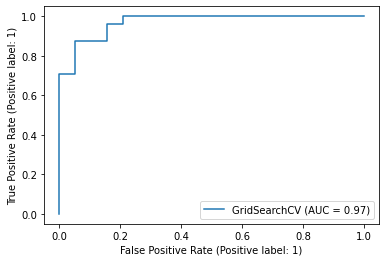

In [35]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_rf_reg, X_test, y_test);

The curve shows that our model is quite good, ideally we're aiming for AUC = 1.0. 

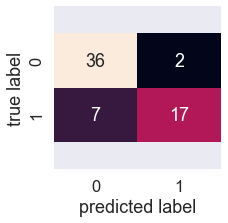

In [36]:
# Confusion matrix
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("predicted label") # predictions go on the x-axis
    plt.ylabel("true label") # true labels go on the y-axis
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
plot_conf_mat(y_test, y_preds)

We have 7 occasions where the model predicted underbudget when it should've been overbudget (false negative) and 2 where it labeled underbudget when it shouldn't been overbudget (false positive).

In [37]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        38
           1       0.89      0.71      0.79        24

    accuracy                           0.85        62
   macro avg       0.87      0.83      0.84        62
weighted avg       0.86      0.85      0.85        62



Recall that:

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

These models were done with a single set. To make it more accurate, we should try using a cross-validation (i.e., permuted models).

In [38]:
# Instantiate cross validation of RF
cvrf = RandomForestClassifier(max_depth=None,
                              min_samples_leaf=3,
                              min_samples_split=10,
                              n_estimators=800)

cv_acc = np.mean(cross_val_score(cvrf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy")) # accuracy as scoring

We can also do cross-validation with the other metrics as shown below.

In [39]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(cvrf,
                                       X,
                                       y,
                                       cv=5, 
                                       scoring="precision")) # precision as scoring

# Cross-validated recall score
cv_recall = np.mean(cross_val_score(cvrf,
                                    X,
                                    y,
                                    cv=5, 
                                    scoring="recall")) # recall as scoring

# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(cvrf,
                                X,
                                y,
                                cv=5, 
                                scoring="f1")) # f1 as scoring

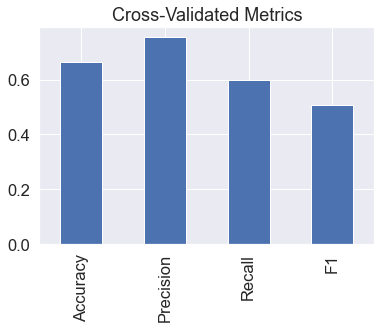

In [41]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

In [43]:
# View metrics in a dataframe

cv_metrics2 = pd.DataFrame([{"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1}])
cv_metrics2

,Accuracy,Precision,Recall,F1
0,0.662771,0.755476,0.6,0.509078


### Optional. View classifier tree

In [44]:
# Fit an instance of LogisticRegression (taken from above)
cvrf.fit(X_train, y_train);

estimator = cvrf.estimators_[5]

Make a list of the independent variables for figure purposes

In [45]:
X_columns = []
for col in X.columns:
    X_columns.append(col)
print(X_columns)

['metro', 'zehrs_nf', 'hg', 'wm', 'tt', 'campus', 'mf', 'bb', 'longos', 'trotters', 'resto', 'baker', 'misc', 'spending_days', 'spendyear', 'spendmonth', 'spendday']


In [46]:
from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file="tree.dot",
                      feature_names = X_columns,
                      class_names = "budget",
                      rounded = True,
                      proportion = False,
                      precision = 2, filled = True)

To convert `dot` to `png`, type the following into an anaconda prompt

`conda install python-graphviz`

`dot -Tpng tree.dot  -o tree.png ` 

| <img src="tree.png" width=500/> | 
|:--:| 
| Resulting tree |

Now let's look at the **feature importance** to see which feature(s) are contributing the most to the outcome of the model?

In [47]:
from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(
    cvrf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X_columns)

Elapsed time to compute the importances: 9.804 seconds


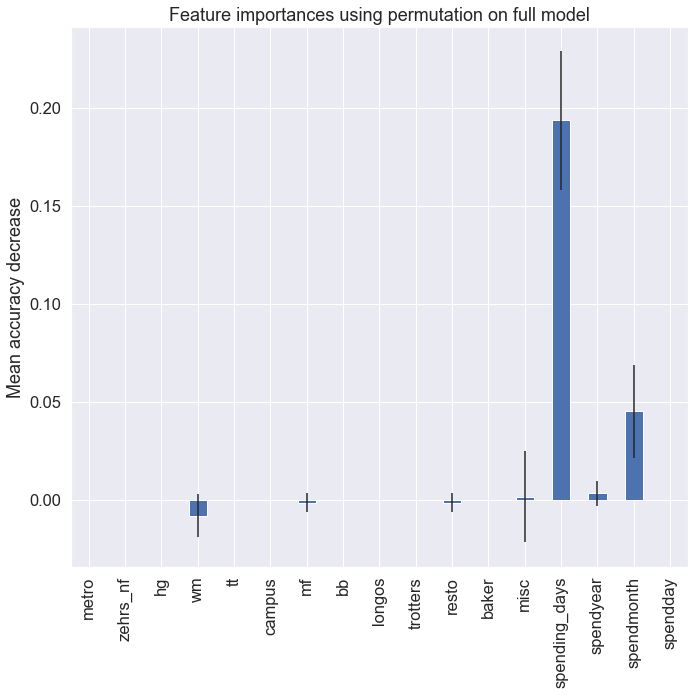

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

It seems that our budget is most impacted by the frequency of our spending.

For more information on permutation feature importance, click [here](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance).

### 6. Future work

Based on the current model, there's room for improvement. 

1. Get more data
    * There are a lot of 0's that could be impacting the overall accuracy of the data
2. Perform a more in-depth GridSearchCV to get better accuracy
3. For-loops to make the coding more efficient